# melのチェックを行う用のノートブック

In [1]:
# ここに確認したいwavを配置.

input_wav_paths = ['./pre_voice/Universal/jsut_ver1.1_BASIC5000_0001.wav', './pre_voice/Universal/VCTK-Corpus_p257_256.wav']

p_config = './config/JSUT_JSSS/preprocess.yaml'

100%|██████████| 2/2 [00:03<00:00,  1.73s/it]


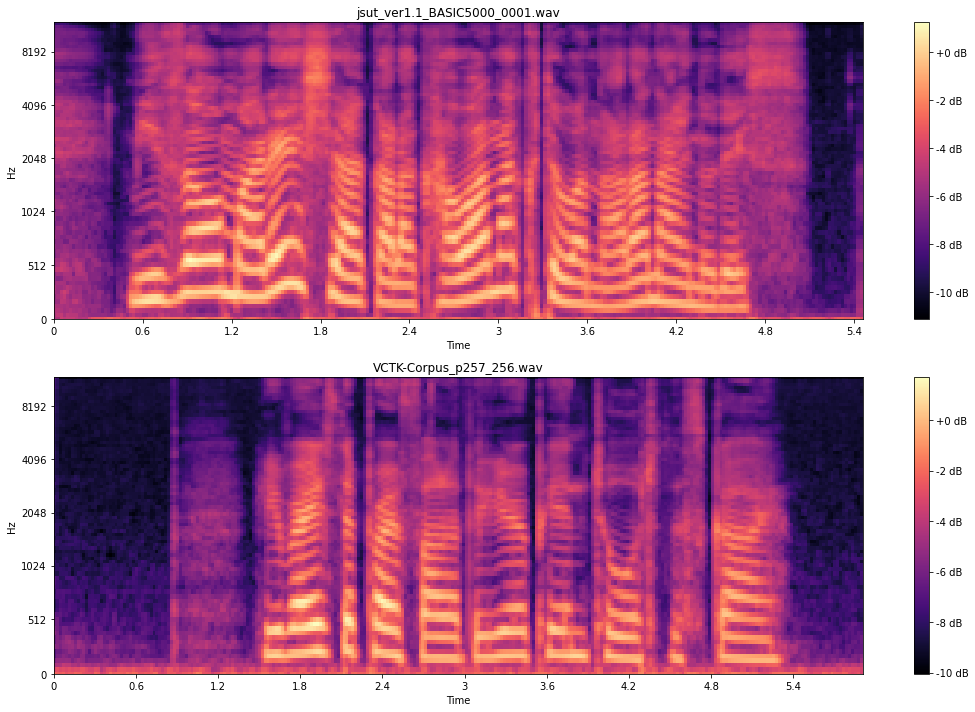

In [2]:
# まずは, NARS2Sのほう.
import yaml

from utils.utils import get_mels, plot_mels

preprocess_config = yaml.load(
        open(p_config, "r", encoding='utf-8'), Loader=yaml.FullLoader
    )
mels = get_mels(wav_paths=input_wav_paths, config=preprocess_config, mel_num=80)

plot_mels(mels, input_wav_paths, sr=preprocess_config["preprocessing"]["audio"]["sampling_rate"], sharex=False)

100%|██████████| 2/2 [00:00<00:00, 100.00it/s]


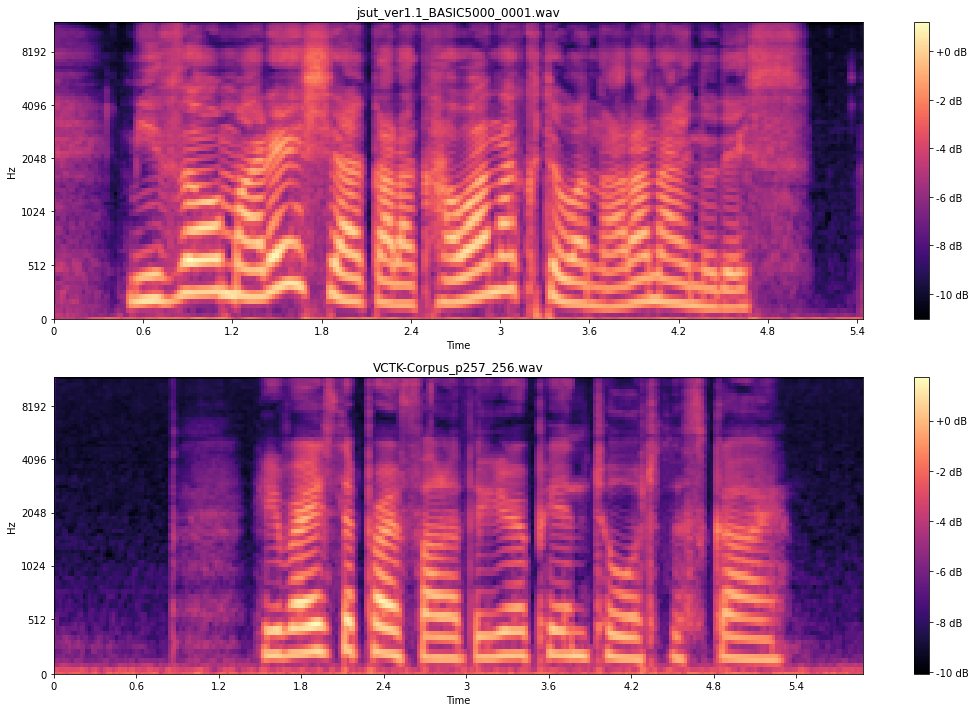

In [10]:
# hifiganのものでmelを作ってみる.
import os

from tqdm import tqdm
import torch

from hifigan.meldataset import load_wav, mel_spectrogram

mels = []

sr = preprocess_config["preprocessing"]["audio"]["sampling_rate"]
n_fft = preprocess_config["preprocessing"]["stft"]["filter_length"]
num_mels = preprocess_config["preprocessing"]["mel"]["n_mel_channels"]
hop_size = preprocess_config["preprocessing"]["stft"]["hop_length"]
win_size = preprocess_config["preprocessing"]["stft"]["win_length"]
fmin = preprocess_config["preprocessing"]["mel"]["mel_fmin"]
fmax = preprocess_config["preprocessing"]["mel"]["mel_fmax"]

for wav_path in tqdm(input_wav_paths):
    audio, sampling_rate = load_wav(wav_path, sr)
    assert sampling_rate == sr
    # audio = audio / 32768.0
    audio = torch.FloatTensor(audio).to("cuda")
    audio = audio.unsqueeze(0)

    mel = mel_spectrogram(audio, n_fft, num_mels, sr,
                            hop_size, win_size, fmin, fmax)
    mel = mel.squeeze(0).cpu().numpy()
    mels.append(mel)

plot_mels(mels, input_wav_paths, sr=sr, sharex=False)


In [9]:
import shutil
import os
from glob import glob
from tqdm import tqdm

input_path = './raw_data/JSUT_JSSS/JSSS'
output_path = './raw_data/JSUT_to_from_JSSS/target'

os.makedirs(output_path, exist_ok=True)
for t_path in tqdm(glob(os.path.join(input_path,'*.wav'))):
    output_wav_path = os.path.join(output_path, "JSUT2JSSS_"+os.path.basename(t_path))
    shutil.copy(t_path, output_wav_path)

100%|██████████| 3229/3229 [00:04<00:00, 702.39it/s]
